$$
\begin{align*}
1 + x_1 + 2  x_2 + 3 x_3 =& 0,\\
x_1 - x_3 =& 0.
\end{align*}
$$

Examining Node x1
Node x1 as a function of other nodes
x1 + (-0.9999999999999998 x3) = 0

Examining Node x2
Node x2 as a function of other nodes
x2 + (0.5000000000000001 ) + (0.9999999999999998 x1) + (0.9999999999999998 x3) = 0

Examining Node x3
Node x3 as a function of other nodes
x3 + (-0.9999999999999998 x1) = 0



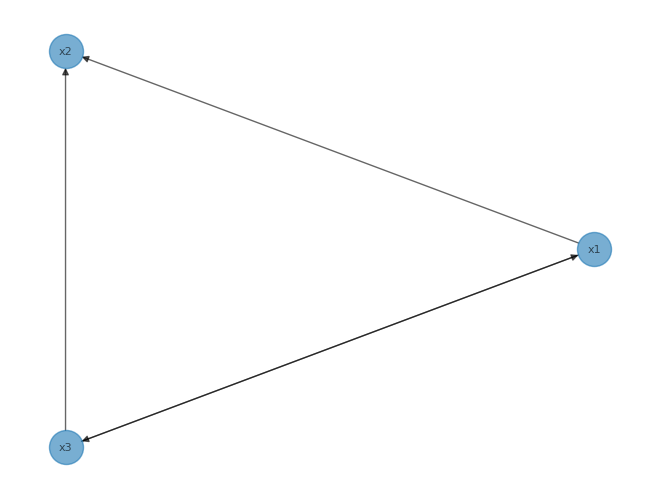

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from GraphDiscovery import *

from jax.config import config
config.update("jax_enable_x64", True)

def matern_five_halfs(v1, v2, a=1, sigma=1):
    d = np.sqrt(np.sum((v1 - v2) ** 2))
    return a*(1+np.sqrt(5)*d/sigma +5*d**2/(3*sigma**2))*np.exp(-np.sqrt(5)*d/sigma)

ks = onp.array([matern_five_halfs]*3)
kpca = GraphDiscovery()

d = 3
preG = nx.complete_graph(d).to_directed()
G = nx.create_empty_copy(preG)
names = onp.array(['x1', 'x2', 'x3'])
G = nx.relabel_nodes(G, dict(zip(range(d), names)))

examing_nodes = np.array([0, 1, 2])

x1s = np.linspace(-2, 2,100)
x3s = x1s #+ onp.random.normal(size = 100)*1e-1
x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

# x1s = np.linspace(-2, 2,100)
# x3s = 0.5 * x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
# x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

fig = plt.figure
X = np.array([x1s, x2s, x3s])
gamma = 1e-13
G = kpca.discovery_in_graph(X, ks, gamma, G, names, examing_nodes, beta1=1, beta2=1e-2, beta3=0, epsilon=1e-3, verbose=True)
kpca.plot_graph(G)
plt.show()

$$
\begin{align*}
1 + x_1 + 2  x_2 + 3 x_3 =& 0,\\
x_1^2 - x_3 =& 0.
\end{align*}
$$

Examining Node x1
Node x1 as a function of other nodes
x1 + (-1.9999999995070539 x2) + (-1.9999999993224264 x3) + (-3.999999999292868 x2x2) + (-11.999999997796932 x3x2) + (-8.999999998298506 x3x3) = 0

Examining Node x2
Node x2 as a function of other nodes
x2 + (0.5000000000000009 ) + (0.4999999999999992 x1) + (1.4999999999999991 x3) = 0

Examining Node x3
Node x3 as a function of other nodes
x3 + (-0.9999999999999697 x1x1) = 0



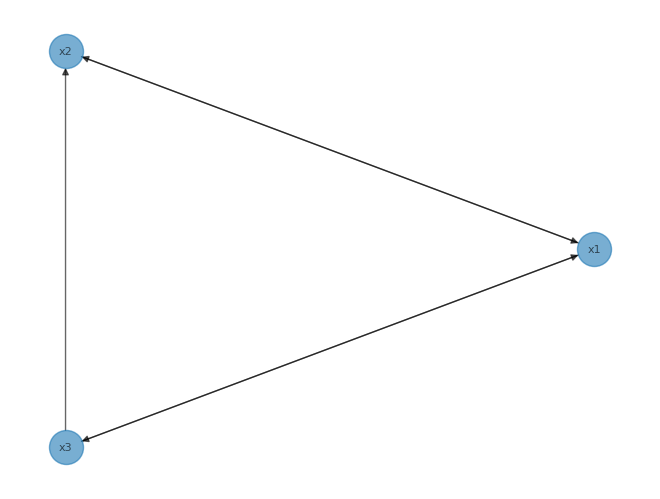

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from GraphDiscovery import *

from jax.config import config
config.update("jax_enable_x64", True)

def matern_five_halfs(v1, v2, a=1, sigma=1):
    d = np.sqrt(np.sum((v1 - v2) ** 2))
    return a*(1+np.sqrt(5)*d/sigma +5*d**2/(3*sigma**2))*np.exp(-np.sqrt(5)*d/sigma)

ks = onp.array([matern_five_halfs]*3)
kpca = GraphDiscovery()

d = 3
preG = nx.complete_graph(d).to_directed()
G = nx.create_empty_copy(preG)
names = onp.array(['x1', 'x2', 'x3'])
G = nx.relabel_nodes(G, dict(zip(range(d), names)))

examing_nodes = np.array([0, 1, 2])

x1s = np.linspace(-2, 2,100)
x3s = x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

# x1s = np.linspace(-2, 2,100)
# x3s = 0.5 * x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
# x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

fig = plt.figure
X = np.array([x1s, x2s, x3s])
gamma = 1e-13
G = kpca.discovery_in_graph(X, ks, gamma, G, names, examing_nodes, beta1=1, beta2=1e-2, beta3=0, epsilon=1e-3, verbose=True)
kpca.plot_graph(G)
plt.show()

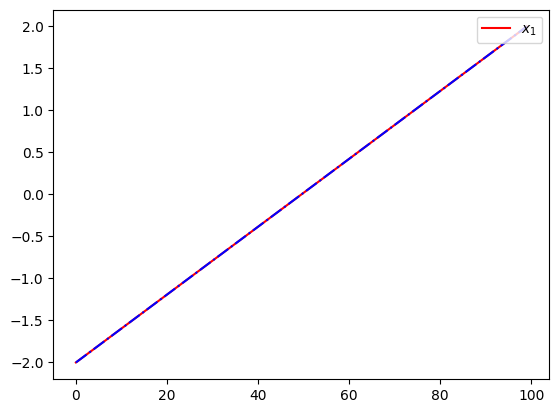

In [4]:
plt.plot(x1s, 'r-', label=r'$x_1$')
plt.plot(-(-1.9999999995070539 * x2s) - (-1.9999999993224264 * x3s) - (-3.999999999292868 * x2s ** 2) - (-11.999999997796932 * x3s * x2s) - (-8.999999998298506 * x3s ** 2), 'b-.')
plt.legend(loc='upper right')

In [5]:
- x1s -(-1.9999999995070539 * x2s) - (-1.9999999993224264 * x3s) - (-3.999999999292868 * x2s ** 2) - (-11.999999997796932 * x3s * x2s) - (-8.999999998298506 * x3s ** 2)

DeviceArray([-1.46258117e-10, -1.34463107e-10, -1.22781785e-10,
             -1.11214149e-10, -9.98454652e-11, -8.86188900e-11,
             -7.75912667e-11, -6.68336497e-11, -5.62465630e-11,
             -4.59579041e-11, -3.58895136e-11, -2.61266564e-11,
             -1.66338054e-11, -7.46780415e-12,  1.39266376e-12,
              9.91917659e-12,  1.81046289e-11,  2.59348099e-11,
              3.34203776e-11,  4.05258049e-11,  4.72475392e-11,
              5.36051203e-11,  5.95647975e-11,  6.51318999e-11,
              7.02957692e-11,  7.50581819e-11,  7.94138089e-11,
              8.33635383e-11,  8.69002648e-11,  9.00257646e-11,
              9.27440347e-11,  9.50466372e-11,  9.69442304e-11,
              9.84332615e-11,  9.95206140e-11,  1.00206510e-10,
              1.00498276e-10,  1.00399800e-10,  9.99179628e-11,
              9.90590387e-11,  9.78313819e-11,  9.62427638e-11,
              9.43033290e-11,  9.20222024e-11,  8.94103507e-11,
              8.64794954e-11,  8.3241867

Examining Node x1
Node x1 as a function of other nodes
x1 + (-1.999999999458396 x2) + (-1.9999999992626272 x3) + (-3.9999999992325685 x2x2) + (-11.999999997614418 x3x2) + (-8.999999998162037 x3x3) = 0

Examining Node x2
Node x2 as a function of other nodes
x2 + (1.0000000000000002e-10 \ sum_{s=1}^100 K(x1,x[s])w[s]) + (1.0000000000000002e-10 \ sum_{s=1}^100 K(x3,x[s])w[s]) = 0
w = 
[ 2.06882073e+09  1.81768724e+09  1.58702665e+09  1.37583248e+09
  1.18312101e+09  1.00793132e+09  8.49325282e+08  7.06387531e+08
  5.78225495e+08  4.63969385e+08  3.62772194e+08  2.73809697e+08
  1.96280453e+08  1.29405805e+08  7.24298765e+07  2.46195757e+07
 -1.47354067e+07 -4.63225969e+07 -7.08067381e+07 -8.88297906e+07
 -1.01010932e+08 -1.07946556e+08 -1.10210275e+08 -1.08352916e+08
 -1.02902525e+08 -9.43643647e+07 -8.32209143e+07 -6.99318701e+07
 -5.49341458e+07 -3.86418716e+07 -2.14463952e+07 -3.71628098e+06
  1.42026895e+07  3.19875177e+07  4.93379881e+07  6.59766681e+07
  8.16489082e+07  9.61228416e+

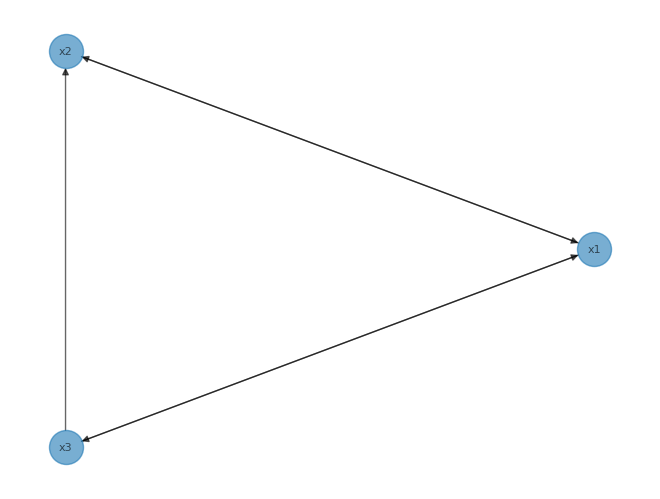

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from GraphDiscovery import *

from jax.config import config
config.update("jax_enable_x64", True)

def matern_five_halfs(v1, v2, a=1, sigma=1):
    d = np.sqrt(np.sum((v1 - v2) ** 2))
    return a*(1+np.sqrt(5)*d/sigma +5*d**2/(3*sigma**2))*np.exp(-np.sqrt(5)*d/sigma)

ks = onp.array([matern_five_halfs]*3)
kpca = GraphDiscovery()

d = 3
preG = nx.complete_graph(d).to_directed()
G = nx.create_empty_copy(preG)
names = onp.array(['x1', 'x2', 'x3'])
G = nx.relabel_nodes(G, dict(zip(range(d), names)))

examing_nodes = np.array([0, 1, 2])

x1s = np.linspace(-2, 2,100)
x3s = x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

# x1s = np.linspace(-2, 2,100)
# x3s = 0.5 * x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
# x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

fig = plt.figure
X = np.array([x1s, x2s, x3s])
gamma = 1e-13
G = kpca.discovery_in_graph(X, ks, gamma, G, names, examing_nodes, beta1=1, beta2=1e-2, beta3=1e-10, epsilon=1e-3, verbose=True)
kpca.plot_graph(G)
plt.show()

Examining Node x1
Node x1 as a function of other nodes
x1 + (-1.9999999994897735 x2) + (-1.9999999992780886 x3) + (-3.9999999992838187 x2x2) + (-11.99999999777599 x3x2) + (-8.999999998291106 x3x3) = 0

Examining Node x2
Node x2 as a function of other nodes
x2 + (0.5000000000000002 ) + (0.49999999999999906 x1) + (1.4999999999999991 x3) = 0

Examining Node x3
Node x3 as a function of other nodes
x3 + (-0.99999999999997 x1x1) = 0



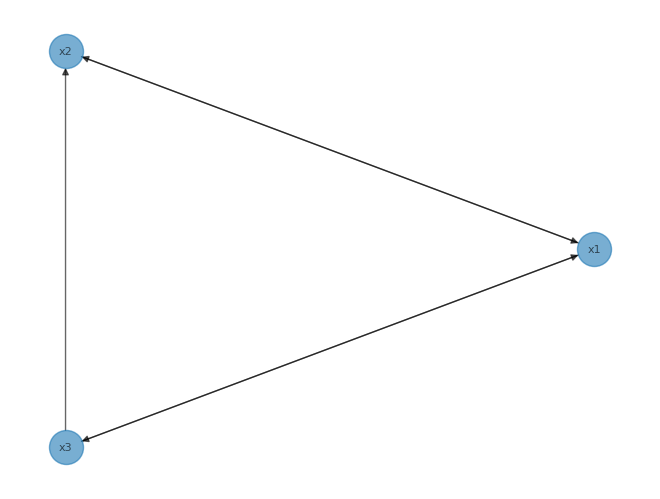

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from GraphDiscovery import *

from jax.config import config
config.update("jax_enable_x64", True)

def matern_five_halfs(v1, v2, a=1, sigma=1):
    d = np.sqrt(np.sum((v1 - v2) ** 2))
    return a*(1+np.sqrt(5)*d/sigma +5*d**2/(3*sigma**2))*np.exp(-np.sqrt(5)*d/sigma)

ks = onp.array([matern_five_halfs]*3)
kpca = GraphDiscovery()

d = 3
preG = nx.complete_graph(d).to_directed()
G = nx.create_empty_copy(preG)
names = onp.array(['x1', 'x2', 'x3'])
G = nx.relabel_nodes(G, dict(zip(range(d), names)))

examing_nodes = np.array([0, 1, 2])

x1s = np.linspace(-2, 2,100)
x3s = x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

# x1s = np.linspace(-2, 2,100)
# x3s = 0.5 * x1s ** 2 #+ onp.random.normal(size = 100)*1e-1
# x2s = (-1 - x1s - 3 * x3s)/2 #+ onp.random.normal(size = 100)*1e-1

fig = plt.figure
X = np.array([x1s, x2s, x3s])
gamma = 1e-13
G = kpca.discovery_in_graph(X, ks, gamma, G, names, examing_nodes, beta1=1, beta2=1e-2, beta3=1e-15, epsilon=1e-3, verbose=True)
kpca.plot_graph(G)
plt.show()